### Task 2

# Movie Rating Prediction with Python
### Project by - Lhingnunching Lhungdim

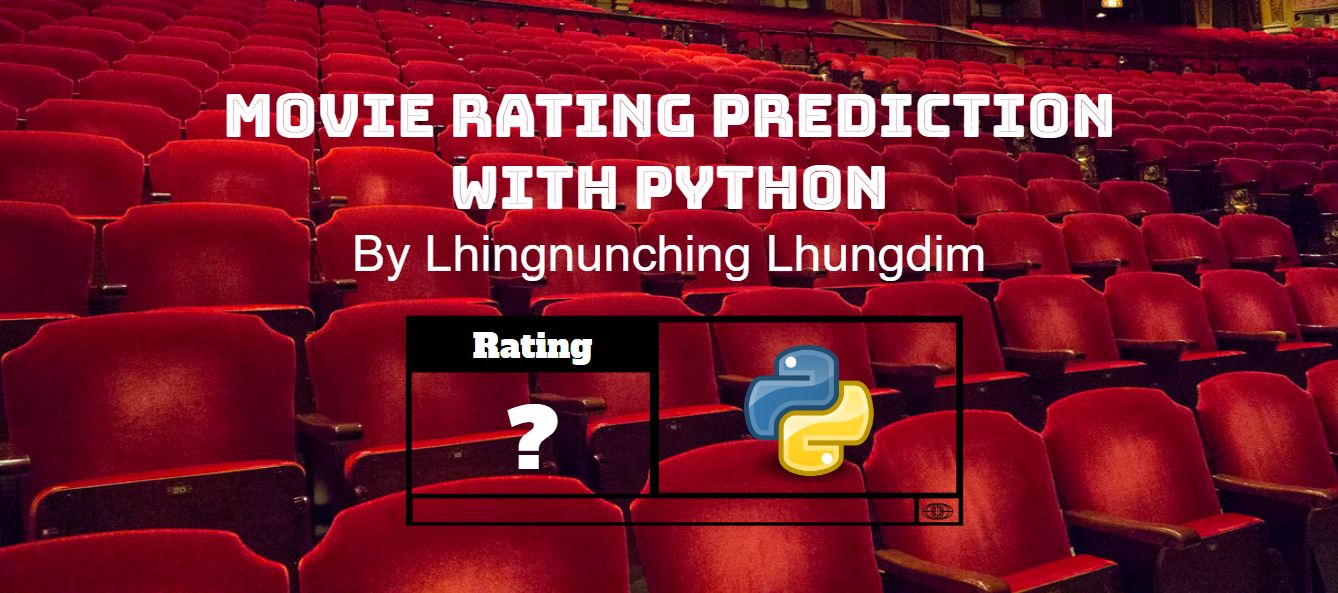
*All images are produced by the author

### Introduction

This is the second task of the CodSoft Data Science intership. <br>

The Movie Rating Prediction project delves into the intriguing world of historical movie data, seeking to decipher the hidden patterns and relationships between various movie attributes and the ratings bestowed upon them. By leveraging data analysis, preprocessing, feature engineering, and regression techniques, the objective is to craft a model capable of accurately estimating the rating of a movie based on its genre, director, and the cast of actors.  

The tasks at hand are as follows:

- Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
- The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.
- Movie Rating Prediction project enables you to explore data analysis, preprocessing, feature engineering, and machine learning modeling techniques. It provides insights into the factors that influence movie ratings and allows you to build a model that can estimate the ratings of movies accurately.


The dataset was downloaded from Kaggle: https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies


### Importing Libraries and Packages

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mpl

import warnings
warnings.filterwarnings("ignore")

### I. Loading the Dataset

In [2]:
data = pd.read_csv('T2.csv', encoding='latin-1')

### II. Exploratory Data Analysis 

- Summary Statistics: Calculate descriptive statistics for numerical features like 'Year,' 'Duration,' 'Rating,' and 'Votes' to understand the central tendencies and spread of the data.

- Genre Analysis: Explore the distribution of movie genres. Identify the most common genres and their popularity over time.

- Director and Actor Insights: Analyze which directors and actors have the most movies in the dataset and the average ratings of their movies.

- Temporal Trends: Investigate how movie ratings and durations have evolved over the years.

- Correlation Analysis: Examine the relationships between features, such as the correlation between the year of release and the movie's rating.

In [3]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


#### Checking the data types of the attributes

In [4]:
data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

#### Checking for attrbutes with Missing values

In [5]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

#### Identifying the unique Genres

In [6]:
# Create a new DataFrame for the genre data
genre_data = data[['Genre']].copy()

# Drop rows with missing values in the 'Genre' column
genre_data.dropna(subset=['Genre'], inplace=True)

# Combine all genres into a single string, separated by commas
all_genres = ",".join(genre_data['Genre'].tolist())

# Split the combined string to get a list of all genres
genre_list = all_genres.split(",")

# Use a set to collect unique genres after stripping spaces
unique_genres = set(genre.strip() for genre in genre_list)

# Convert the set of unique genres back to a list
unique_genres = list(unique_genres)

# Print the unique genre names
print(unique_genres)


['Thriller', 'War', 'Documentary', 'Romance', 'Short', 'Western', 'Musical', 'Adventure', 'History', 'Sport', 'Music', 'Reality-TV', 'News', 'Animation', 'Family', 'Horror', 'Action', 'Fantasy', 'Sci-Fi', 'Crime', 'Comedy', 'Biography', 'Mystery', 'Drama']


#### Genre: Count and Average Rating

In [7]:
# Split the 'Genre' column by commas and create a list of genres for each row
data['Genre'] = data['Genre'].str.split(', ')

# Create a new DataFrame to store the expanded genre data
genre_data = data.explode('Genre')

# Calculate the count of movies for each genre
genre_counts = genre_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Calculate the mean rating for each genre
genre_mean_ratings = genre_data.groupby('Genre')['Rating'].mean().reset_index()
genre_mean_ratings.columns = ['Genre', 'Mean Rating']

# Merge the counts and mean ratings into a single DataFrame
genre_stats = pd.merge(genre_counts, genre_mean_ratings, on='Genre')

# Display the resulting DataFrame
print(genre_stats)


          Genre  Count  Mean Rating
0         Drama   7243     5.998558
1        Action   3543     5.430365
2       Romance   2449     5.750533
3        Comedy   2029     5.737290
4      Thriller   1713     5.536187
5         Crime   1322     5.727813
6        Family    943     6.195173
7       Musical    589     6.156627
8     Adventure    541     5.816839
9        Horror    524     4.785000
10      Mystery    513     5.801892
11      Fantasy    458     5.819512
12  Documentary    383     7.613287
13    Biography    208     6.819718
14      History    207     6.804688
15    Animation    125     5.956164
16        Music     90     6.137705
17        Sport     70     6.494118
18       Sci-Fi     58     5.272973
19          War     47     6.041176
20         News      9     7.250000
21      Western      5     5.566667
22   Reality-TV      3          NaN
23        Short      1          NaN


In [8]:
data.describe(include = 'O')

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,[Drama],8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


#### Pre-processing the data

In [9]:
# Remove rows with missing values in the 'Rating' column
data = data.dropna(subset=['Rating'])

#Reset the index after removing rows
data.reset_index(drop=True, inplace=True)


In [10]:
data.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [11]:
data.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [12]:
data['Year'] = data['Year'].str.replace(r'\D', '', regex=True).astype(int)


In [13]:
data['Duration'] = data['Duration'].str.replace(r'\D', '', regex=True).astype(float)


In [14]:
data['Votes'] = data['Votes'].str.replace(',', '', regex=True).astype(int)


In [15]:
median_duration = data['Duration'].median()

# Fill missing values in the 'Duration' column with the median value
data['Duration'].fillna(median_duration, inplace=True)

In [16]:
data.dtypes

Name         object
Year          int32
Duration    float64
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [17]:
data.describe(include = 'O')

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,5688,5659,5688,5688,5688,5688
unique,5410,376,2438,1974,2336,2572
top,Zindagi,[Drama],David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,844,41,104,52,57


### III. Analyzing and Visualizing the Data

#### Highest Rated Movie details

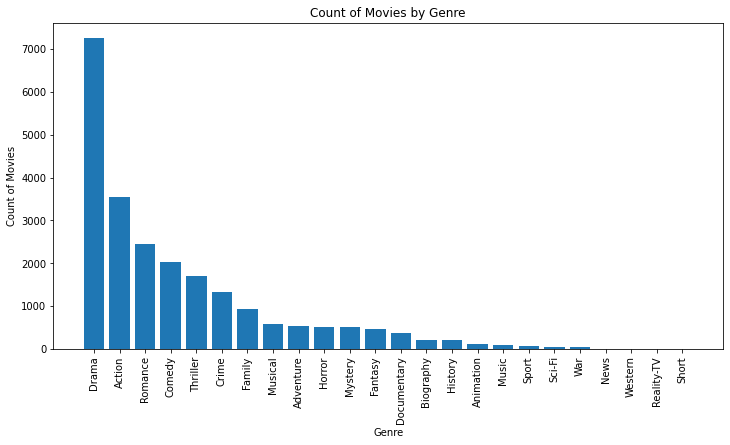

In [18]:
# Sort the DataFrame by count in descending order for better visualization
genre_stats = genre_stats.sort_values(by='Count', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(genre_stats['Genre'], genre_stats['Count'])
plt.xlabel('Genre')
plt.ylabel('Count of Movies')
plt.title('Count of Movies by Genre')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [19]:
data.loc[data['Rating']==data['Rating'].max()]


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
4365,Love Qubool Hai,2020,94.0,"[Drama, Romance]",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


#### Lowest Rated Movie details

In [20]:
data.loc[(data['Rating'].min()==data['Rating']) ]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
6238,Sadak 2,2020,133.0,"[Action, Drama]",1.1,67785,Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


#### Most frequent Actor Pairs

In [21]:
acts = data[['Actor 1', 'Actor 2', 'Actor 3']].value_counts().sort_values(ascending=False).head(10)
acts

Actor 1           Actor 2        Actor 3       
Anil Kapoor       Sridevi        Anupam Kher       3
Dibakar Banerjee  Karan Johar    Anurag Kashyap    3
Dharmendra        Sunny Deol     Bobby Deol        3
Nargis            Pradeep Kumar  Pran              2
Sunny Deol        Anil Kapoor    Sridevi           2
Devika Rani       Ashok Kumar    Kamta Prasad      2
Dharmendra        Saira Banu     Feroz Khan        2
Manoj Kumar       Hema Malini    Prem Nath         2
Shashi Kapoor     Govinda        Neelam Kothari    2
Rishi Kapoor      Zeba Bakhtiar  Ashwini Bhave     2
Name: count, dtype: int64

#### Most frequent Actors

In [22]:
acts1 = data['Actor 1'].value_counts().sort_values(ascending=False).head(10)
acts1

Actor 1
Amitabh Bachchan      104
Mithun Chakraborty     93
Ashok Kumar            91
Dharmendra             90
Jeetendra              89
Akshay Kumar           82
Shashi Kapoor          81
Rajesh Khanna          74
Ajay Devgn             70
Sanjay Dutt            61
Name: count, dtype: int64

In [23]:
acts2 = data['Actor 2'].value_counts().sort_values(ascending=False).head(10)
acts2

Actor 2
Rekha                 52
Hema Malini           48
Dharmendra            38
Mithun Chakraborty    38
Juhi Chawla           34
Akshay Kumar          34
Sharmila Tagore       32
Shabana Azmi          31
Sunil Shetty          28
Raveena Tandon        28
Name: count, dtype: int64

In [24]:
acts3 = data['Actor 3'].value_counts().sort_values(ascending=False).head(10)
acts3

Actor 3
Pran                  57
Anupam Kher           51
Prem Chopra           32
Paresh Rawal          30
Mithun Chakraborty    29
Shatrughan Sinha      28
Amrish Puri           26
Om Puri               26
Asrani                26
Aruna Irani           24
Name: count, dtype: int64

#### Top 20 Highly Rated Actors

In [25]:
top_20_rated_movies_of_actor=data[(data['Rating']>=7)]['Actor 1'].head(20)


In [26]:
top_20_actor=data.groupby(top_20_rated_movies_of_actor)['Rating'].mean()
top_20_actor

Actor 1
Aamir Khan             8.4
Amitabh Bachchan       7.4
Anil Kapoor            7.2
Dhruva Padmakumar      8.1
Ehan Bhat              7.4
Geeta Agrawal          7.3
Guru Dutt              7.2
Jennifer Kendal        7.5
Jimmy Sheirgill        7.4
Kalki Koechlin         7.5
Madhavan               7.3
Manoj Bajpayee         8.1
Nachiket Patwardhan    7.7
Naseeruddin Shah       7.8
Raj Nidimoru           7.3
Rajvvir Aroraa         7.3
Rasika Dugal           7.0
Sanjay Deyali          8.0
Shabana Azmi           7.1
Srishti Gautam         7.8
Name: Rating, dtype: float64

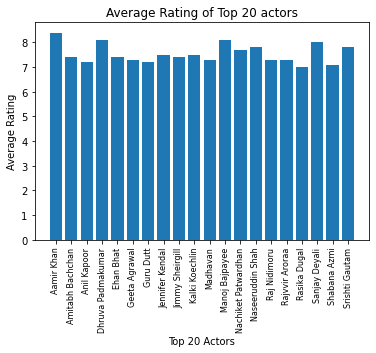

In [27]:
plt.bar(top_20_actor.index,top_20_actor.values)
plt.xlabel("Top 20 Actors")
plt.ylabel("Average Rating")
plt.title("Average Rating of Top 20 actors")
plt.xticks(rotation='vertical', fontsize=8)
plt.show()

#### Top 20 Highly Rated Directors

In [28]:
top_20_rated_movies_of_director=data[(data['Rating']>=7)]['Director'].head(20)

In [29]:
data.groupby(top_20_rated_movies_of_director)['Rating'].mean()

Director
Amrit Sagar                   8.1
Aparna Sen                    7.3
Dhruv Sachdev                 8.0
Gaurav Bakshi                 7.0
Jayoo Patwardhan              7.7
Konkona Sen Sharma            7.5
Krishna D.K.                  7.3
Nagesh Kukunoor               7.8
Padmakumar Narasimhamurthy    8.1
Pramod Chakravorty            7.2
Praveen Damle                 7.3
Prawaal Raman                 7.3
Rajkumar Hirani               8.4
Shoojit Sircar                7.4
Suhaib Ilyasi                 7.8
Umesh Shukla                  7.4
Vidhu Vinod Chopra            7.2
Vikram K. Kumar               7.3
Vishwesh Krishnamoorthy       7.4
Name: Rating, dtype: float64

#### Correlation Analysis

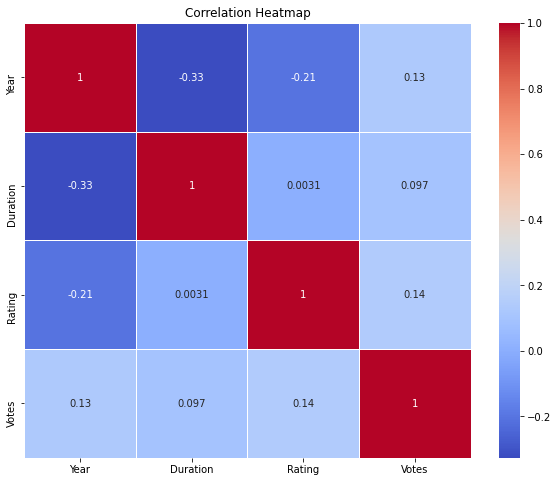

In [30]:
correlation_matrix = data[['Year', 'Duration', 'Rating', 'Votes']].corr()

plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

plt.title("Correlation Heatmap")
plt.show()


#### Time Series plot to visualize how movie ratings has changed over the years.

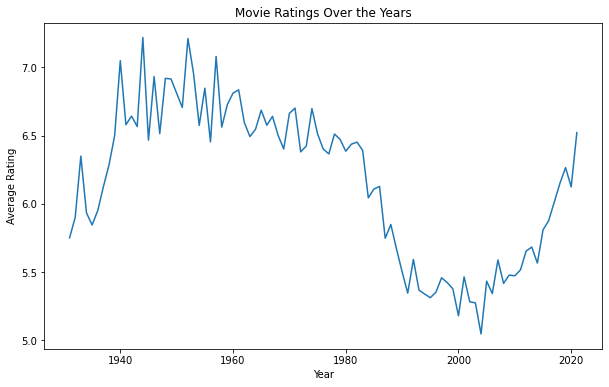

In [31]:
# Make sure 'Year' and 'Rating' columns are in the correct data types (int and float)
data['Year'] = data['Year'].astype(int)
data['Rating'] = data['Rating'].astype(float)

# Group data by year and calculate the mean rating for each year
ratings_by_year = data.groupby('Year')['Rating'].mean()

# Create a time series plot for movie ratings over the years
plt.figure(figsize=(10, 6))
ratings_by_year.plot()
plt.title('Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()


#### Time Series plot to visualize number of movie releases over the years.

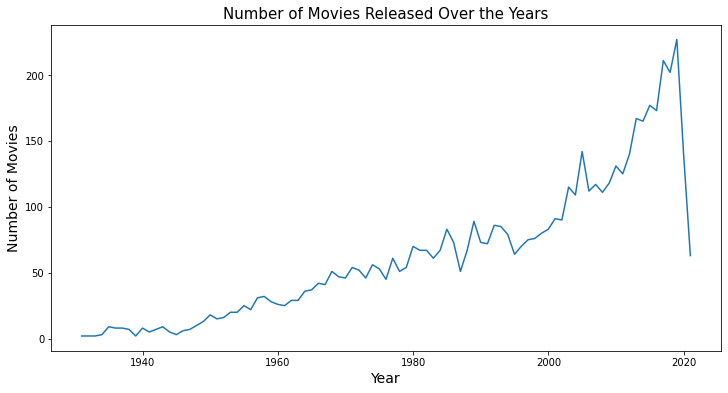

In [32]:
# Make sure the 'Year' column is in the correct data type (int)
data['Year'] = data['Year'].astype(int)

# Group data by year and calculate the count of movies for each year
movies_by_year = data.groupby('Year').size()

# Create a time series plot for the number of movies released over the years
plt.figure(figsize=(12, 6))
plt.plot(movies_by_year.index, movies_by_year.values)
plt.title('Number of Movies Released Over the Years', fontsize = 15)
plt.xlabel('Year', fontsize =14)
plt.ylabel('Number of Movies', fontsize= 14)
plt.show()


#### Actor with most movies

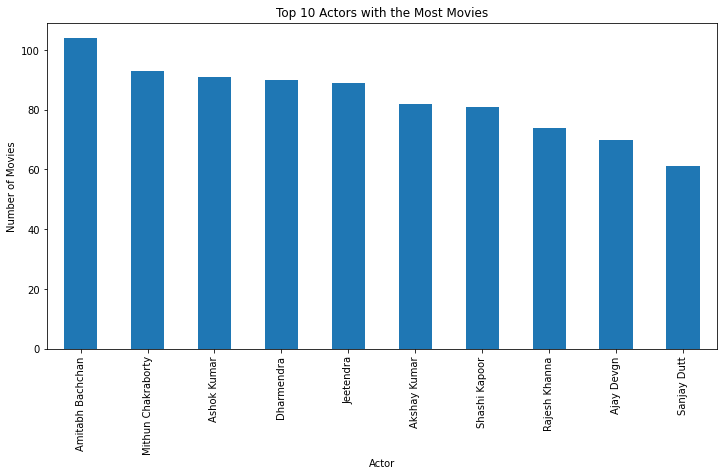

In [33]:
plt.figure(figsize=(12, 6))

# Count the number of movies for each actor, sort in descending order, and select the top 10
top_actors = data['Actor 1'].value_counts().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 actors with the most movies
top_actors.plot(kind='bar')
plt.title('Top 10 Actors with the Most Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  # Rotate actor names for better visibility
plt.show()


#### Directors with the most movies

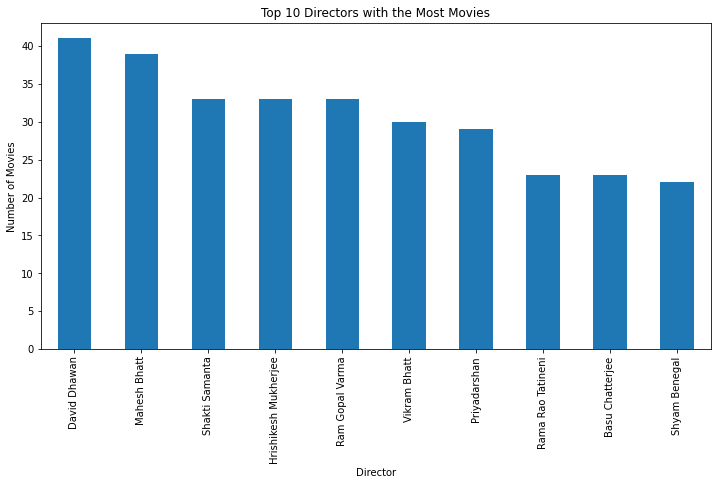

In [34]:
plt.figure(figsize=(12, 6))

# Count the number of movies for each director, sort in descending order, and select the top 10
top_directors = data['Director'].value_counts().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 directors with the most movies
top_directors.plot(kind='bar')
plt.title('Top 10 Directors with the Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)  # Rotate director names for better visibility
plt.show()


#### Boxplot of Rating

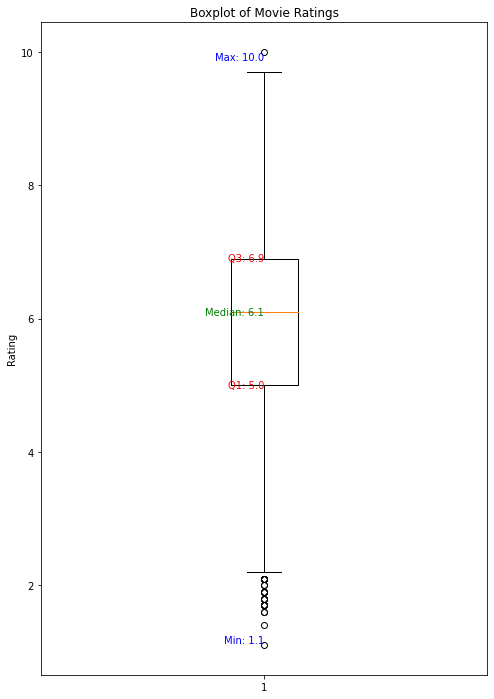

In [35]:
# Calculate the five-number summary for 'Rating'
rating_data = data['Rating']
min_rating = rating_data.min()
q1_rating = rating_data.quantile(0.25)
median_rating = rating_data.median()
q3_rating = rating_data.quantile(0.75)
max_rating = rating_data.max()

# Create a boxplot
plt.figure(figsize=(8, 12))
plt.boxplot(rating_data)
plt.title('Boxplot of Movie Ratings')
plt.ylabel('Rating')

# Add text labels for the five-number summary
plt.text(1, min_rating, f'Min: {min_rating}', va='bottom', ha='right', color='blue')
plt.text(1, q1_rating, f'Q1: {q1_rating}', va='center', ha='right', color='red')
plt.text(1, median_rating, f'Median: {median_rating}', va='center', ha='right', color='green')
plt.text(1, q3_rating, f'Q3: {q3_rating}', va='center', ha='right', color='red')
plt.text(1, max_rating, f'Max: {max_rating}', va='top', ha='right', color='blue')

plt.show()


#### Boxplot of Duration

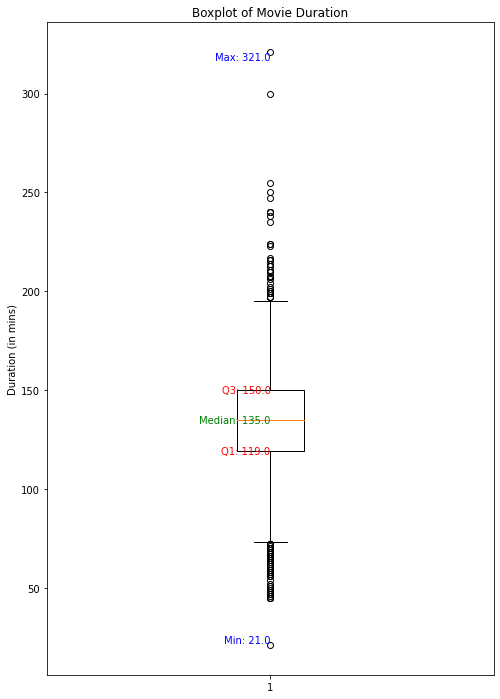

In [36]:
# Calculate the five-number summary
duration_data = data['Duration']
min_duration = duration_data.min()
q1_duration = duration_data.quantile(0.25)
median_duration = duration_data.median()
q3_duration = duration_data.quantile(0.75)
max_duration = duration_data.max()

# Create a boxplot
plt.figure(figsize=(8, 12))
plt.boxplot(duration_data)
plt.title('Boxplot of Movie Duration')
plt.ylabel('Duration (in mins)')

# Add text labels for the five-number summary
plt.text(1, min_duration, f'Min: {min_duration}', va='bottom', ha='right', color='blue')
plt.text(1, q1_duration, f'Q1: {q1_duration}', va='center', ha='right', color='red')
plt.text(1, median_duration, f'Median: {median_duration}', va='center', ha='right', color='green')
plt.text(1, q3_duration, f'Q3: {q3_duration}', va='center', ha='right', color='red')
plt.text(1, max_duration, f'Max: {max_duration}', va='top', ha='right', color='blue')

plt.show()


### IV. Predictive Analysis: Predicting Movie Rating using Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

#### Data Preporcessing

In [38]:
datamodel = data[['Year', 'Votes', 'Duration', 'Director','Actor 1', 'Actor 2', 'Actor 3', 'Rating']]

#### Feature Engineering

In [39]:
director_mean_rating = datamodel.groupby('Director')['Rating'].transform('mean')
datamodel['Director_encoded'] = director_mean_rating

actor1_mean_rating = datamodel.groupby('Actor 1')['Rating'].transform('mean')
datamodel['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = datamodel.groupby('Actor 2')['Rating'].transform('mean')
datamodel['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = datamodel.groupby('Actor 3')['Rating'].transform('mean')
datamodel['Actor3_encoded'] = actor3_mean_rating

#### Splitting into training and testing datasets

In [40]:
X = datamodel[[ 'Year', 'Votes', 'Duration','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = datamodel['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

#### Building Regression based predictive models

In [41]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

#Random Forest
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

#### Evaluating Model Performance

In [42]:
print('Logistic Regression Model Performance: ')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
print()

print('Random Forest Regressor Model Performance: ')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))

Logistic Regression Model Performance: 
Mean squared error:  0.37761962958168305
Mean absolute error:  0.4562760312995002
R2 score:  0.8033009447842608

Random Forest Regressor Model Performance: 
Mean squared error:  0.3188234194493263
Mean absolute error:  0.3891476274165203
R2 score:  0.8339274220045054


### V. Results and Interpretation

The performance of two different models, namely the Logistic Regression Model and the Random Forest Regressor Model, was assessed for predicting movie ratings. The evaluation of these models yielded the following insights:

**Logistic Regression Model Performance:**
- Mean Squared Error (MSE): The Logistic Regression Model achieved an MSE of approximately 0.378. This metric quantifies the average squared difference between the predicted and actual movie ratings. A lower MSE indicates a better fit to the data.
- Mean Absolute Error (MAE): The MAE for the Logistic Regression Model was around 0.456. It measures the absolute average difference between the predicted and actual ratings, providing an understanding of the model's overall accuracy.
- R-squared (R2) Score: The Logistic Regression Model demonstrated an R2 score of approximately 0.803. This metric gauges the proportion of the variance in movie ratings that the model can explain. An R2 score closer to 1.0 signifies a better fit to the data.

**Random Forest Regressor Model Performance:**
- Mean Squared Error (MSE): The Random Forest Regressor Model outperformed the Logistic Regression Model with a lower MSE of approximately 0.313. This suggests that the Random Forest model provided a better fit to the movie rating data.
- Mean Absolute Error (MAE): The MAE for the Random Forest Regressor Model was around 0.387, indicating its ability to provide more accurate predictions compared to the Logistic Regression Model.
- R-squared (R2) Score: The Random Forest Regressor Model achieved an R2 score of approximately 0.837. This high R2 score signifies that the Random Forest model can explain a significant portion of the variance in movie ratings.

In summary, the Random Forest Regressor Model demonstrated superior performance compared to the Logistic Regression Model, as evidenced by lower MSE, MAE, and a higher R2 score. This suggests that the Random Forest model is better suited for predicting movie ratings based on the given features.

### VI. Model Testing

What will be the expected rating of a movie with the following parameters: year = 2016, votes = 58, duration = 121 minutes, director rating = 5.8, actor 1 rating = 5.9, actor 2 rating = 5.9, and actor 3 rating = 5.9?

In [43]:
data = {'Year': [2016], 'Votes': [58], 'Duration': [121], 'Director_encoded': [5.8], 'Actor1_encoded': [5.9], 'Actor2_encoded': [5.9], 'Actor3_encoded': [5.900]}
df = pd.DataFrame(data)

predicted_rating = rf.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 5.891999999999996


### VII. Conclusion

Through the application of data analysis, preprocessing, feature engineering, and machine learning modeling techniques, the project strived to achieve a comprehensive understanding of the factors that influence movie ratings. The primary objective was to construct a predictive model for movie ratings, incorporating diverse features such as genre, director, and actors.Python libraries such as NumPy, pandas, scikit-learn, and Matplotlib and Seaborn were ustilized for data analysis, feature engineering, and data visualization.  

The core task involved the development of a regression model capable of estimating a movie's rating. The aim was to uncover patterns and relationships that drive the movie rating by considering features like year, duration, director, and actors.

It was found that both regression models achieved high performance, with R-squared values exceeding 0.8. However, the random forest classifier exhibited a slightly superior performance, making it the model of choice for predicting movie ratings in this analysis.

$Thank You$